In [1]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);
#numpy
import numpy as np


Welcome to JupyROOT 6.16/00


### Get Data and MC files

In [2]:
#pPb
MCfile_name_allCuts_pPb = '/home/dhruv/17g6a1_5GeV60GeV_100Kevents_wTOFCut_phosDCAlgap_1GeVbinning_new.root'
MCfile_name_noNLM_pPb = '/home/dhruv/17g6a1_5GeV60GeV_100Kevents_noNLMCut_phosDCAlgap_1GeVbinning_new.root'


MCfile1 = ROOT.TFile(MCfile_name_allCuts_pPb)
MCfile2 = ROOT.TFile(MCfile_name_noNLM_pPb)


## Get response Matrix, normalize it, plot it

# Efficiency and Fake rate


****************************************
Minimizer is Linear
Chi2                      =      4.71166
NDf                       =           27
p0                        =     0.940731   +/-   0.00458384  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


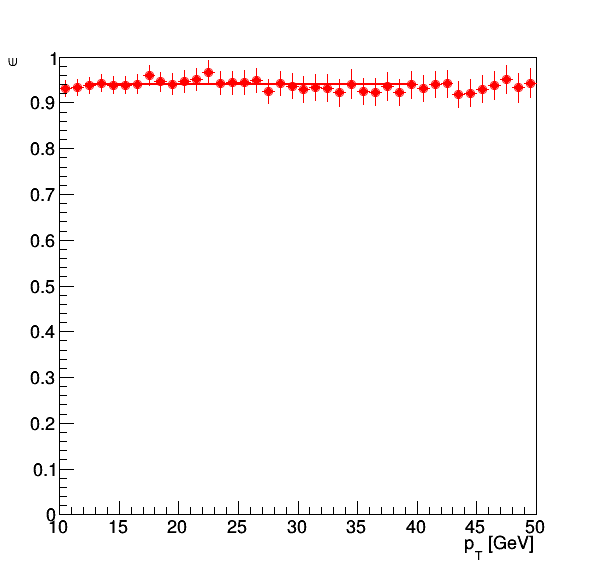

In [5]:
#Get efficiency1 and fake rate
#efficiency1 = MCfile1.Get("efficiency1");
efficiency1 = MCfile1.Get("hRecoTruth").Clone()
efficiency1.Divide(MCfile1.Get("hTruth"))
#fakerate   = MCfile1.Get("h_Fake");

#Plot efficiency1 and fake rate
efficiency1.SetTitle('; p_{T} [GeV];#epsilon')
efficiency1.SetMinimum(0.0)
efficiency1.SetMaximum(1.0)
efficiency1.SetMarkerStyle(20)
efficiency1.SetMarkerColor(2)
efficiency1.SetLineColor(2)
efficiency1.GetXaxis().SetRangeUser(10,50)
#fakerate.SetMarkerStyle(20)
#fakerate.SetLineColor(4)
#fakerate.SetMarkerColor(4)

for i in range(efficiency1.GetNbinsX()):
    low = efficiency1.GetBinLowEdge(i)
    center =   efficiency1.GetBinCenter(i)
    high = efficiency1.GetBinLowEdge(i+1)
    content =  efficiency1.GetBinContent(i)
    error =  efficiency1.GetBinError(i)
    #print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
    #sum += (error/content)**2


c = ROOT.TCanvas('c','c',600,600)
efficiency1.Fit('pol0', '', '', 12,40)
efficiency1.Draw()
#fakerate.Draw('same')


#label = Legend("")
#label.Add(efficiency1,'efficiency1','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.95)
c.Draw()
#c.SaveAs('efficiency1_photon_pPb.pdf')


****************************************
Minimizer is Linear
Chi2                      =      3.43643
NDf                       =           27
p0                        =     0.959923   +/-   0.00465188  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


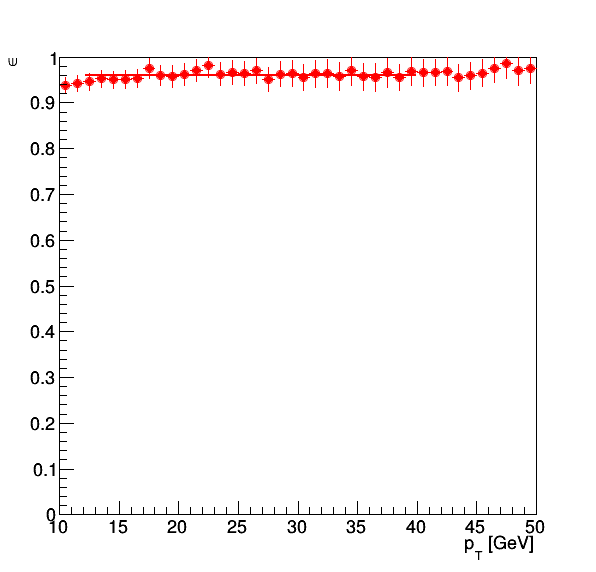

In [6]:
#Get efficiency2 and fake rate
#efficiency2 = MCfile2.Get("efficiency2");
efficiency2 = MCfile2.Get("hRecoTruth").Clone()
efficiency2.Divide(MCfile2.Get("hTruth"))
#fakerate   = MCfile2.Get("h_Fake");

#Plot efficiency2 and fake rate
efficiency2.SetTitle('; p_{T} [GeV];#epsilon')
efficiency2.SetMinimum(0.0)
efficiency2.SetMaximum(1.0)
efficiency2.SetMarkerStyle(20)
efficiency2.SetMarkerColor(2)
efficiency2.SetLineColor(2)
efficiency2.GetXaxis().SetRangeUser(10,50)
#fakerate.SetMarkerStyle(20)
#fakerate.SetLineColor(4)
#fakerate.SetMarkerColor(4)

for i in range(efficiency2.GetNbinsX()):
    low = efficiency2.GetBinLowEdge(i)
    center =   efficiency2.GetBinCenter(i)
    high = efficiency2.GetBinLowEdge(i+1)
    content =  efficiency2.GetBinContent(i)
    error =  efficiency2.GetBinError(i)
    #print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
    #sum += (error/content)**2


c = ROOT.TCanvas('c','c',600,600)
efficiency2.Fit('pol0', '', '', 12,40)
efficiency2.Draw()
#fakerate.Draw('same')


#label = Legend("")
#label.Add(efficiency2,'efficiency2','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.95)
c.Draw()
#c.SaveAs('efficiency2_photon_pPb.pdf')

# Plotting Efficiency

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file photon_efficiency_comparison.pdf has been created


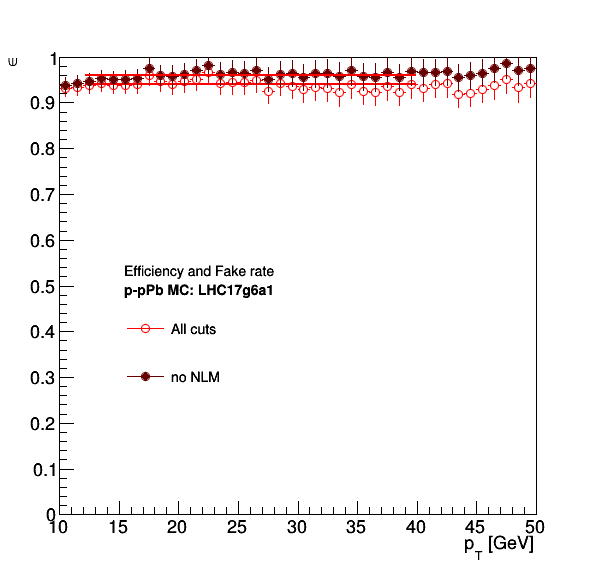

In [9]:
#all cuts
efficiency1.SetLineColor(ROOT.kRed)
efficiency1.SetMarkerColor(ROOT.kRed)
efficiency1.SetMarkerStyle(24)
efficiency1.GetXaxis().SetRangeUser(0.5,13)

#no NLM
efficiency2.SetLineColor(ROOT.kRed+3)
efficiency2.SetMarkerColor(ROOT.kRed+3)
efficiency2.SetMarkerStyle(20)


legend = ROOT.TLegend(0.2, 0.3, 0.55, 0.55)
legend.SetBorderSize(0)
legend.SetHeader("#splitline{Efficiency and Fake rate}{#bf{p-pPb MC: LHC17g6a1}}")


legend.AddEntry(efficiency1, "All cuts")
legend.AddEntry(efficiency2, "no NLM")


c = ROOT.TCanvas('c','c',600,600)

efficiency1.Draw('e')
efficiency2.Draw('samee')




legend.Draw("same")
c.Update()
c.Draw()

c.SaveAs("photon_efficiency_comparison.pdf")

# Plotting Response Matrix

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file trackCorrectionFactors_pPbAndpp.pdf has been created


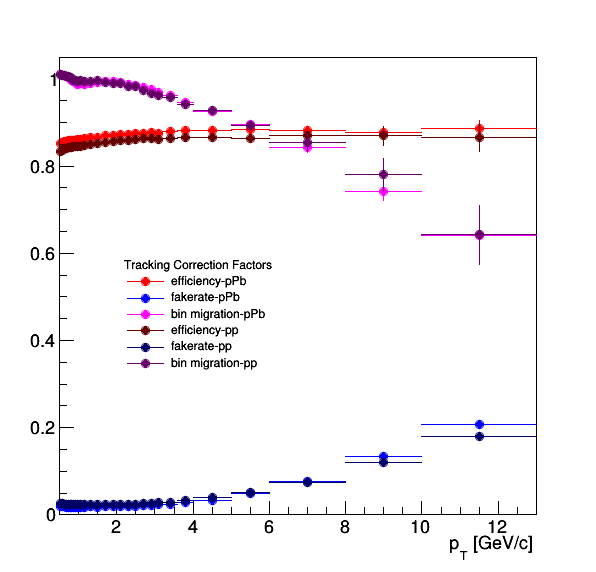

In [25]:
#pPb
efficiency3.SetLineColor(ROOT.kRed)
efficiency3.SetMarkerColor(ROOT.kRed)
efficiency3.SetMarkerStyle(20)

fakerate3.SetLineColor(ROOT.kBlue)
fakerate3.SetMarkerColor(ROOT.kBlue)
fakerate3.SetMarkerStyle(20)

ratio_mc_counts3.SetLineColor(ROOT.kMagenta)
ratio_mc_counts3.SetMarkerColor(ROOT.kMagenta)
ratio_mc_counts3.SetMarkerStyle(20)
ratio_mc_counts3.GetXaxis().SetRangeUser(0.5,20)

#pp
efficiency4.SetLineColor(ROOT.kRed+3)
efficiency4.SetMarkerColor(ROOT.kRed+3)
efficiency4.SetMarkerStyle(20)

fakerate4.SetLineColor(ROOT.kBlue+3)
fakerate4.SetMarkerColor(ROOT.kBlue+3)
fakerate4.SetMarkerStyle(20)

ratio_mc_counts4.SetLineColor(ROOT.kMagenta+3)#blue
ratio_mc_counts4.SetMarkerColor(ROOT.kMagenta+3)
ratio_mc_counts4.SetMarkerStyle(20)
ratio_mc_counts4.GetXaxis().SetRangeUser(0.5,13)

legend = ROOT.TLegend(0.2, 0.35, 0.55, 0.55)
legend.SetBorderSize(0)
legend.SetHeader("Tracking Correction Factors")
#legend.AddEntry(ratio_mc_counts00, "1 GeV binnning tracking study(\"corrected old\")")
#legend.AddEntry(ratio_mc_counts0, "1 GeV binnning tracking study wRangeSet 1-15 (old)")
#legend.AddEntry(ratio_mc_counts1, "variable binning(new)")
#legend.AddEntry(ratio_mc_counts2, "pp binning-sent to fernando")
#legend.AddEntry(ratio_mc_counts4, "all events pp binning")

legend.AddEntry(efficiency3, "efficiency-pPb")
legend.AddEntry(fakerate3, "fakerate-pPb")
legend.AddEntry(ratio_mc_counts3, "bin migration-pPb")

legend.AddEntry(efficiency4, "efficiency-pp")
legend.AddEntry(fakerate4, "fakerate-pp")
legend.AddEntry(ratio_mc_counts4, "bin migration-pp")



c = ROOT.TCanvas('c','c',600,600)
#ratio_mc_counts00.Draw('e')
#ratio_mc_counts0.Draw('samee')
#ratio_mc_counts1.Draw('samee')
#ratio_mc_counts2.Draw('samee')
#ratio_mc_counts3.Draw('samee')

efficiency3.Draw('e')
fakerate3.Draw('samee')
ratio_mc_counts3.Draw('samee')

efficiency4.Draw('samee')
fakerate4.Draw('samee')
ratio_mc_counts4.Draw('samee')


legend.Draw("same")
c.Update()
c.Draw()

#c.SaveAs("trackCorrectionFactors_pPbAndpp.png")
#c.SaveAs("trackCorrectionFactors_pPbAndpp.pdf")